In [7]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [8]:
df_all = pd.read_csv('../Processed Data/AllPlayerDataProcessed.csv')
df_gk = pd.read_csv('../Processed Data/GKDataProcessed.csv')
df_bk = pd.read_csv('../Processed Data/BKDataProcessed.csv')
df_md = pd.read_csv('../Processed Data/MDDataProcessed.csv')
df_fwd = pd.read_csv('../Processed Data/FWDDataProcessed.csv')
df = df_all.drop(columns=['Index','Position'])
df.head()

,Age,Overall,Weak Foot,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,4.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,94,4.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,92,5.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,91,3.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,91,5.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [9]:
# Shape of dataframe
# print(" Shape of dataframe: ", df.shape)

In [10]:
# Variable inspection

# print("Names of columns ", list(df.columns))

In [11]:
# Split Overall as a Target value
df_model = df
target = df_model.Overall
df_model2 = df_model.drop(['Overall'], axis = 1)

# Splitting into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_model2, target, test_size=0.2)

In [12]:
# Applying KNN regression to the dataset
# Initailly test K = 5
from sklearn.neighbors import KNeighborsRegressor
K = 5
model = KNeighborsRegressor(n_neighbors=K)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Finding the r2 score and root mean squared error
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score 
print('r2 score: '+str(r2_score(y_test, predictions)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

r2 score: 0.9301341651732816
RMSE : 1.7996173453075186


In [13]:
print('Predicted weights: %s' % predictions)
print('Actual weights: %s' % y_test)

Predicted weights: [63.8 66.8 62.6 ... 52.6 64.8 65.8]
Actual weights: 9027     66
8137     67
10884    65
5256     70
18029    50
2415     74
56       86
8059     67
11429    64
12873    63
1693     75
803      78
746      78
15721    59
10026    65
11370    64
12205    63
10131    65
14637    60
8853     66
941      77
3855     72
12218    63
3896     72
8114     67
17977    50
10456    65
17390    54
15390    59
3028     73
         ..
5702     69
10376    65
17218    55
9250     66
5155     70
678      79
6814     68
12148    63
12786    63
16475    57
921      77
297      82
13937    61
15638    59
15174    60
1743     75
15804    58
430      80
12896    63
1232     76
108      85
4516     71
13532    62
10177    65
77       85
12362    63
2295     74
16943    56
8235     67
6041     69
Name: Overall, Length: 3630, dtype: int64


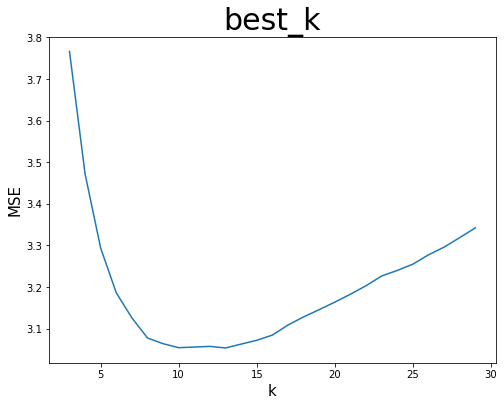

In [14]:
# Below we use grid search to find the best K.
from sklearn.model_selection import GridSearchCV
score_list = []
param_test = {'n_neighbors': np.arange(3, 30, 1)}
Gs = GridSearchCV(estimator=KNeighborsRegressor(weights='uniform'),
                  param_grid=param_test, scoring='neg_mean_squared_error', cv=5)  
Gs.fit(X_train, y_train)
score_list = -Gs.cv_results_['mean_test_score']  # 取反,损失是负数
plt.figure(figsize=[8, 6])
plt.plot(range(3, 30, 1), score_list)
plt.xlabel("k", fontsize=15)
plt.ylabel("MSE", fontsize=15)
plt.title("best_k", fontsize=30)
plt.show()

In [15]:
# Gs.best_estimator_
# Gs.best_score_
# Gs.best_params_

In [16]:
# Use the best K for prediction
K = Gs.best_params_['n_neighbors']
model = KNeighborsRegressor(n_neighbors=K, weights='uniform')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print('r2 score: '+str(r2_score(y_test, predictions)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

r2 score: 0.9355614257513254
RMSE : 1.7283062694928915


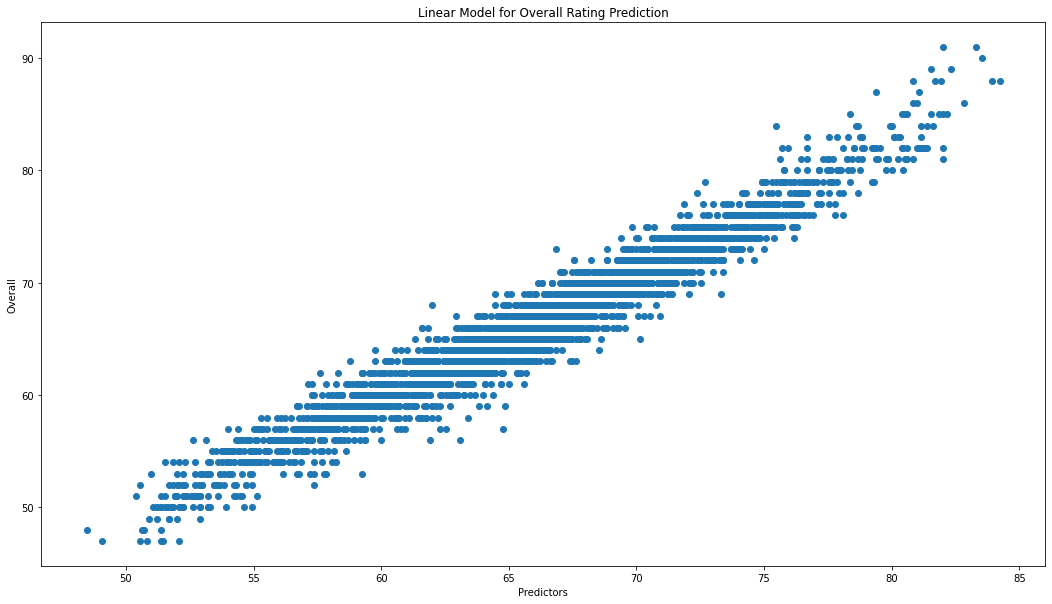

In [17]:
plt.figure(figsize=(18,10))
plt.scatter(predictions, y_test)
plt.xlabel("Predictors")
plt.ylabel('Overall')
plt.title("Linear Model for Overall Rating Prediction")
plt.show()